## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import re

# import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [3]:
overallPassengerNum = dataset["PassengerId"].max()
overallPassengerSurvived = (dataset["Survived"].value_counts()).iloc[1]
overallPassengerDead = (dataset["Survived"].value_counts()).iloc[0]

genderSurvived = dataset[dataset["Survived"] == 1].groupby("Sex")["Survived"].value_counts()
percentageSurvived = (overallPassengerSurvived / overallPassengerNum) * 100
percentageDead = (overallPassengerDead / overallPassengerNum) * 100

gender = dataset['Sex'].value_counts()


survivedPercentageFemale = (genderSurvived.iloc[0] / overallPassengerSurvived)
survivedPercentageMale = (genderSurvived.iloc[1] / overallPassengerSurvived)

femaleCount = np.array([gender.iloc[1] - genderSurvived[0], genderSurvived[0]])
maleCount = np.array([gender.iloc[0] - genderSurvived[1], genderSurvived[1]])


print(f"percentageSurvived: {round(percentageSurvived, 2)}%, percentageDead: {round(percentageDead, 2)}%")

percentageSurvived: 38.38%, percentageDead: 61.62%


**Задача 2:** Відтворіть ці графіки  
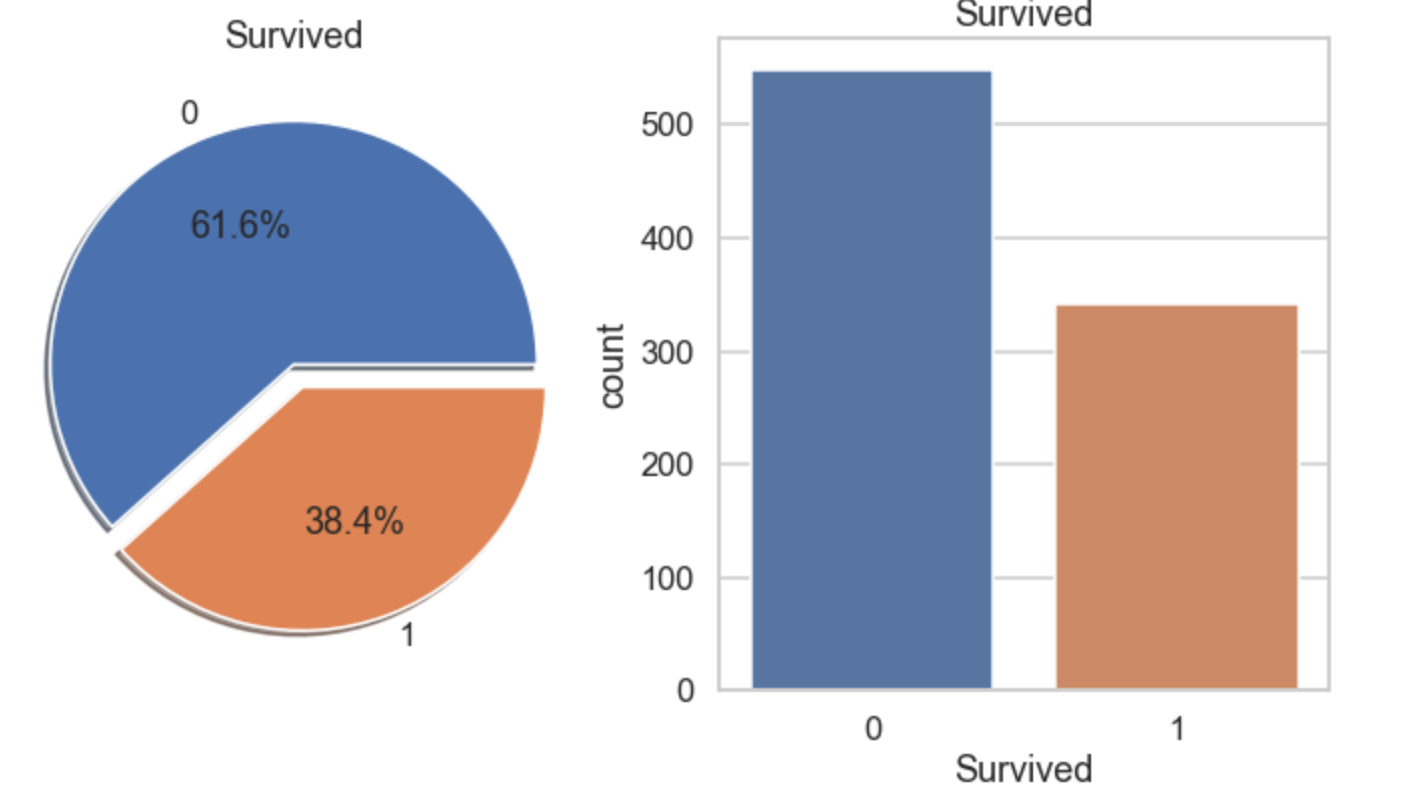


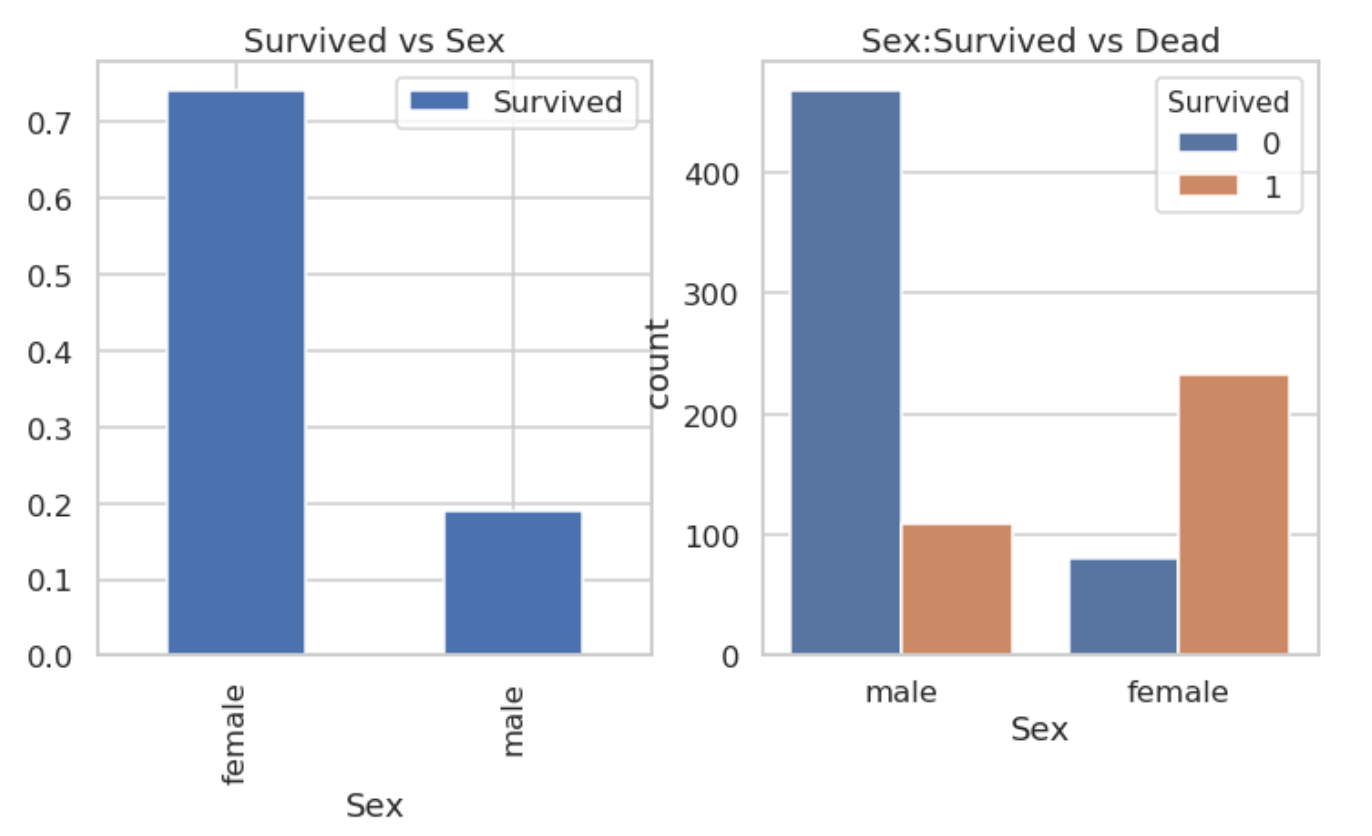

In [4]:
sns.set_style('whitegrid')

sns.set_context("notebook", font_scale=1.2)

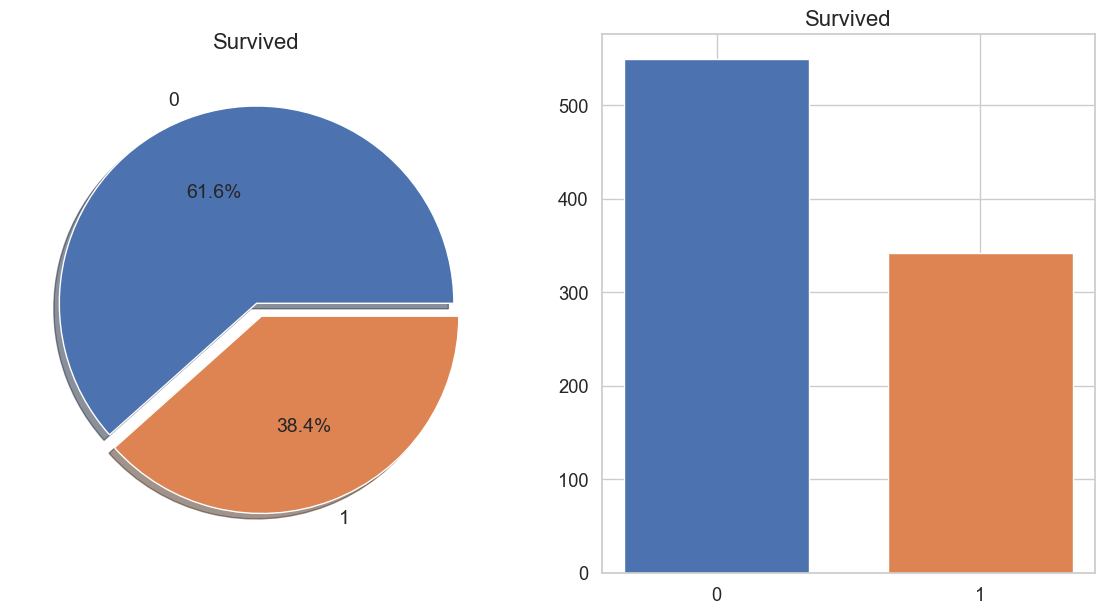

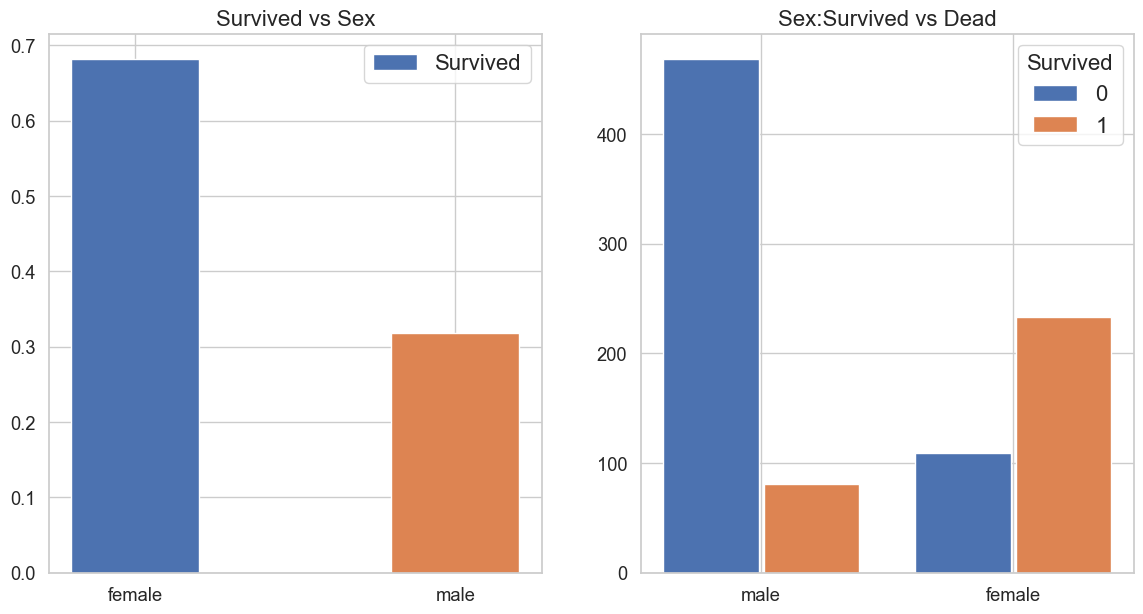

In [5]:
colors = sns.color_palette('deep')
sns.set_style('whitegrid')
_, axes_1 = plt.subplots(ncols=2, figsize=(14, 7))

axes_1[0].pie(x=[percentageDead, percentageSurvived], labels=[0, 1], colors=colors, explode=[0, 0.07], autopct='%.1f%%', shadow=True, textprops={'fontsize': 14})
axes_1[0].set_title("Survived", fontsize=16)

axes_1[1].bar(height=[overallPassengerDead, overallPassengerSurvived], x=[0, 1], color=colors, width=0.7)
axes_1[1].set_title("Survived", fontsize=16)
axes_1[1].set_xticks([0, 1])


_, axes_2 = plt.subplots(ncols=2, figsize=(14, 7))


axes_2[0].bar(height=[survivedPercentageFemale, survivedPercentageMale], x=['female', 'male'], width=0.4, align='center', color=colors)
axes_2[0].set_title("Survived vs Sex", fontsize=16)
axes_2[0].legend(["Survived"], fontsize=16)

axes_2[1].bar(np.arange(len(maleCount)), height=[maleCount[0], maleCount[1]], width=0.38, label='Male', color=colors[0])
axes_2[1].bar(np.arange(len(femaleCount)) + 0.4, height=[femaleCount[0], femaleCount[1]], width=0.38, label='Female', color=colors[1])
axes_2[1].set_title("Sex:Survived vs Dead", fontsize=16)
axes_2[1].set_xticks(np.arange(len(maleCount)) + 0.4 / 2)
axes_2[1].set_xticklabels(['male', 'female'])
axes_2[1].legend([0,1], fontsize=16).set_title("Survived", prop={"size": 16})

plt.show()

Прокоментуйте побудовані графіки

На графіках можна побачити відсотковане співвідношення між виживанням та смертністю на титаніку. \
**0 - смерть, 1 - виживання.** \
Перші два графіки просто показують цю статистику у вигляді процентів та чисел, скільки померло та вижило. Наступні графіки \
показують цю статистику вже у гендерному розрізі. Тобто співвідношення між жінкою та чоловіком та їхніми судьбами на титаніку. \
Як ми бачимо по графіках, чоловікам пощастило менше.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [6]:
missingValues = dataset.isna().sum()
print(f'missingValues:\n{missingValues}')

missingValues:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [7]:
overralFemale = dataset[dataset["Sex"] == 'female']
def extractName(name):
    match = re.search(r'\(([^)]+)\)', name)
    if match: return match.group(1).split()[0]
    else: return re.search(r'\.\s*([^\s]+)', name).group(1)

femaleNames = overralFemale['Name'].apply(extractName)
mostPopularFemaleNames = femaleNames.value_counts().head()
print(f'Most Popular Female Names (Top 5):\n{mostPopularFemaleNames}')

Most Popular Female Names (Top 5):
Name
Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
Name: count, dtype: int64


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [8]:
overralMale = dataset[dataset["Sex"] == 'male']
maleNames = overralMale['Name'].apply(extractName)
mostPopularMaleNames = maleNames.value_counts().head()
print(f'Most Popular Male Names (Top 5):\n{mostPopularMaleNames}')

Most Popular Male Names (Top 5):
Name
William    35
John       23
George     13
Thomas     13
Charles    12
Name: count, dtype: int64


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
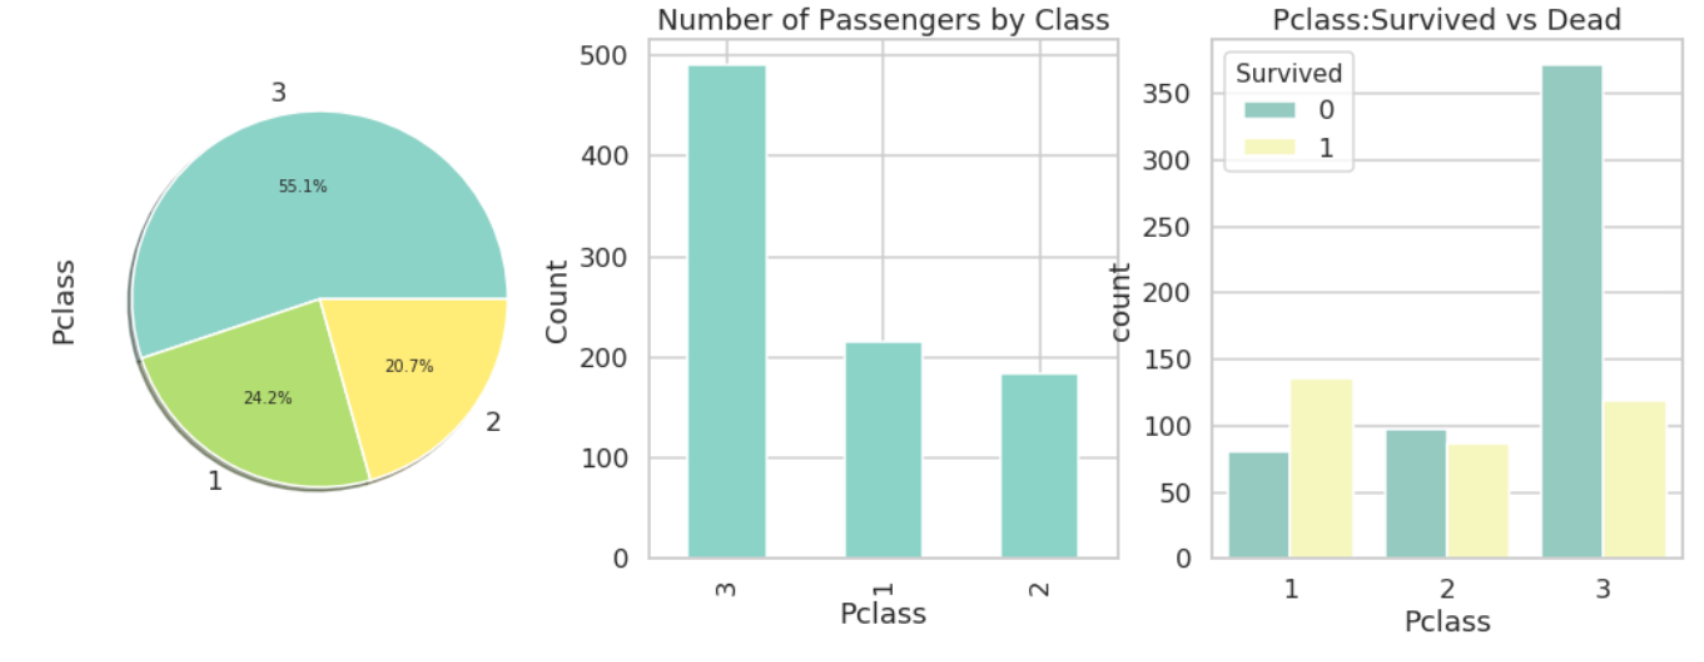

In [9]:
pCLasess = dataset["Pclass"].value_counts()

pClassesGenderDead = dataset[dataset["Survived"] == 0].groupby("Pclass")["Survived"].value_counts()
pClassesGenderSurvived = dataset[dataset["Survived"] == 1].groupby("Pclass")["Survived"].value_counts()

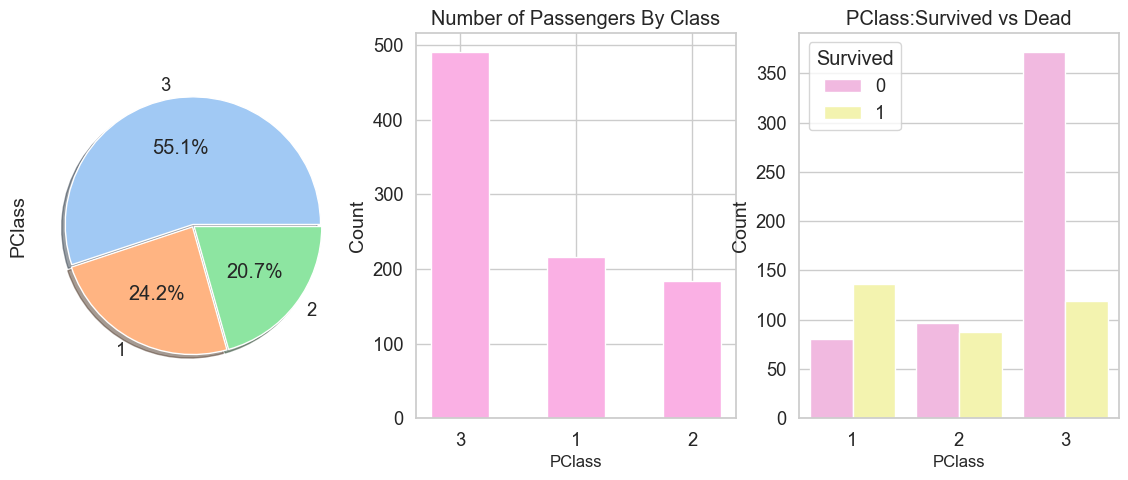

In [10]:
_, axes = plt.subplots(ncols=3, figsize=(14, 5))
colors = sns.color_palette('pastel')

axes[0].pie(x=[pCLasess.iloc[0], pCLasess.iloc[1], pCLasess.iloc[2]], labels=[3, 1, 2], colors=colors, explode=[0.01, 0.01, 0.01], autopct='%.1f%%', shadow=True)
axes[0].set_ylabel("PClass", fontsize=14)

axes[1].bar(height=[pCLasess.iloc[0], pCLasess.iloc[1], pCLasess.iloc[2]], color=colors[6], x=['3', '1', '2'], width=0.5)
axes[1].set_title("Number of Passengers By Class")
axes[1].set_ylabel("Count", fontsize=14)
axes[1].set_xlabel("PClass", fontsize=12)

axes[2].set_title("PClass:Survived vs Dead")
sns.countplot(data=dataset, x="Pclass", hue="Survived", axes=axes[2], palette=[colors[6], colors[8]])
axes[2].set_ylabel("Count", fontsize=14)
axes[2].set_xlabel("PClass", fontsize=12)

plt.show()

Прокоментуйте побудовані графіки

Перша діаграма показує нам відсоткову кількість кожного типу білетів, які були придбані на титаніку. \
Є ***3*** класи квитків: **1, 2, 3 - де 3 клас був найбідніший, а 1 найбагатший** \
Другий графік уже показує ту саму статистику але вже в числах. По графіках зрозуміло, що пасажирів **3** класу було найбільше на судні. \
А третій графік, показує вже у розрізі чи вижили ці пасажири, і до якого класу вони належили. \
Правила до того, що означає **0 та 1** не змінились, з попередніх графіків. З кількості пасажирів **3** класу виходить те, \
що і загинуло найбільше людей саме цього класу.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
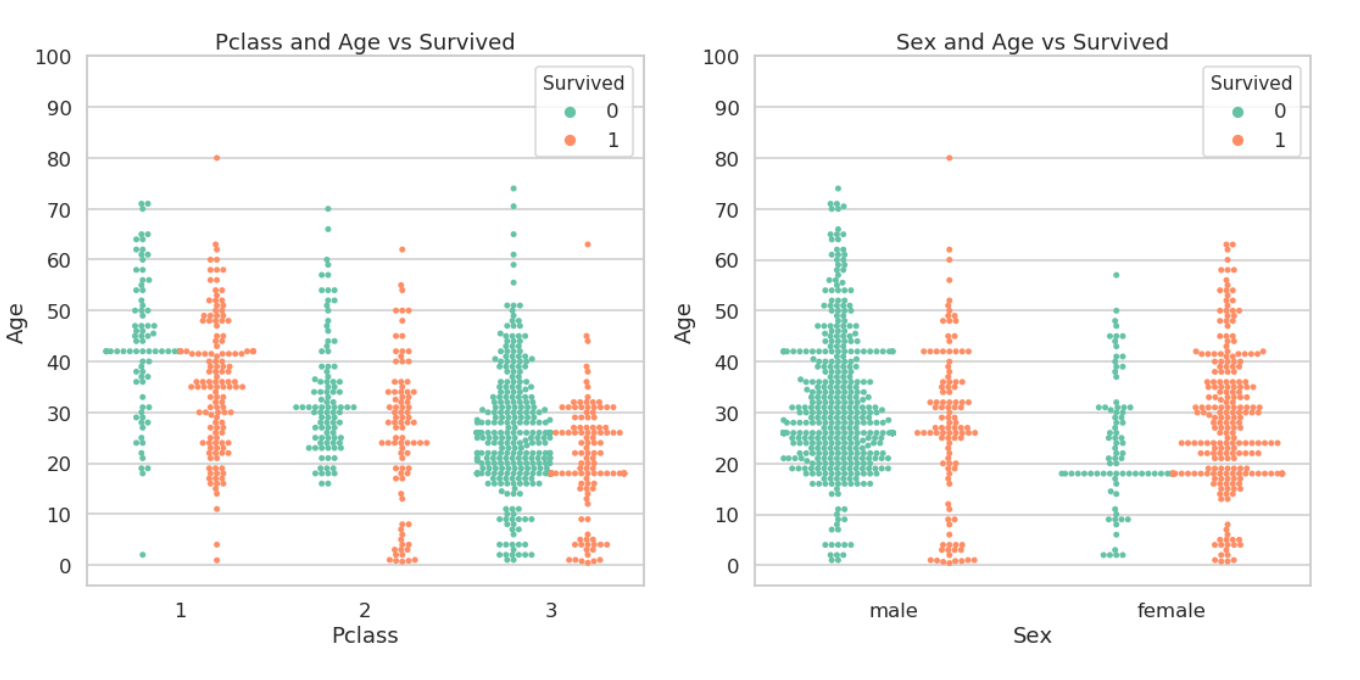![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

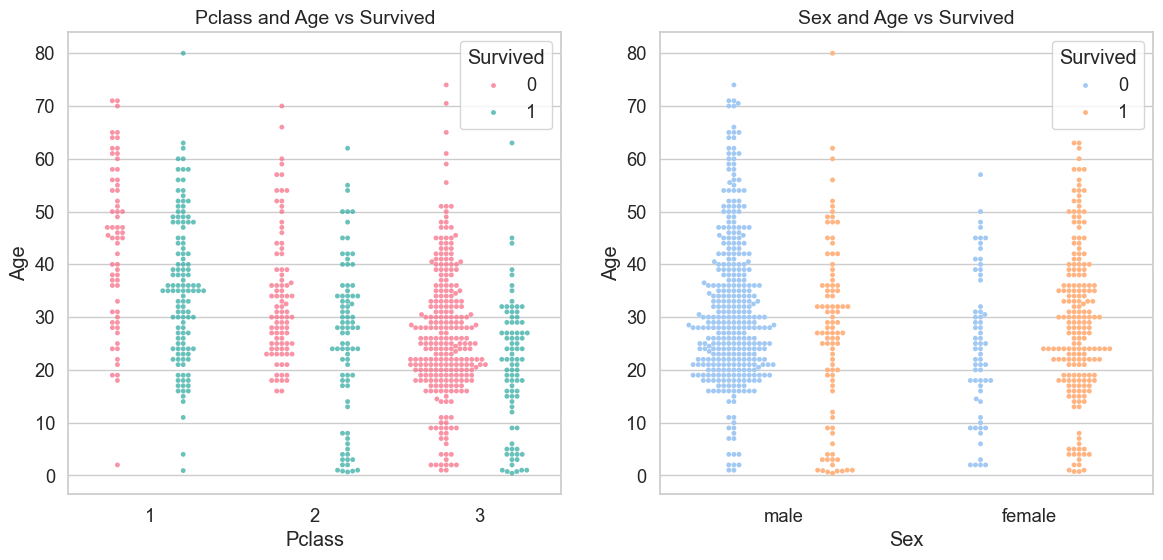

In [11]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.swarmplot(data=dataset, x="Pclass", y="Age", dodge=True, hue='Survived', alpha=0.75, size=3.5, ax=axes[0], palette='husl')
axes[0].set_title('Pclass and Age vs Survived', fontsize=14)

sns.swarmplot(data=dataset, x="Sex", y="Age", dodge=True, hue='Survived', size=3.5, ax=axes[1], palette='pastel')
axes[1].set_title('Sex and Age vs Survived', fontsize=14)

plt.show()

Прокоментуйте побудовані графіки

Ці два кумедні графіки, показують нам інформацію про вікову категорію, клас та судьбу пасажирів. Тобто на першому графіку \
можна побачити, вік пасажирів та, які класи квитків вони купували. \
А на другому графіку можна побачити вікова категорію,, цих людей але в гендерному розрізі. Знову ж таки, по цих діаграмах видно, \
що загинуло найбільше чоловіків, які були віком в середньому від **20 до 40** років.

**Задача 8** Побудуйте наступні діаграми розподілів:  

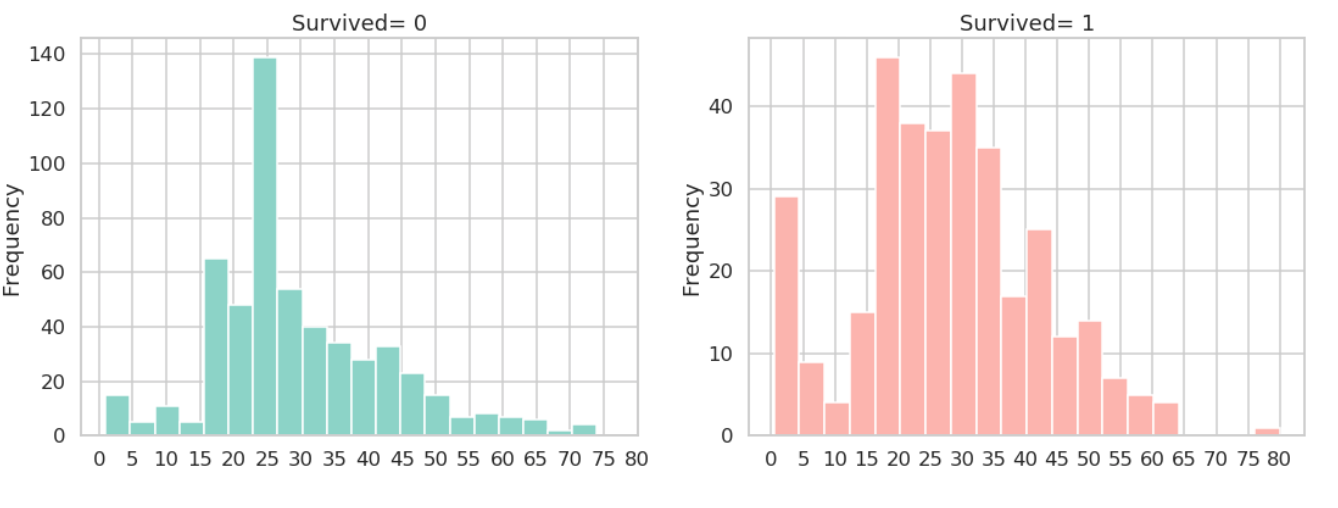



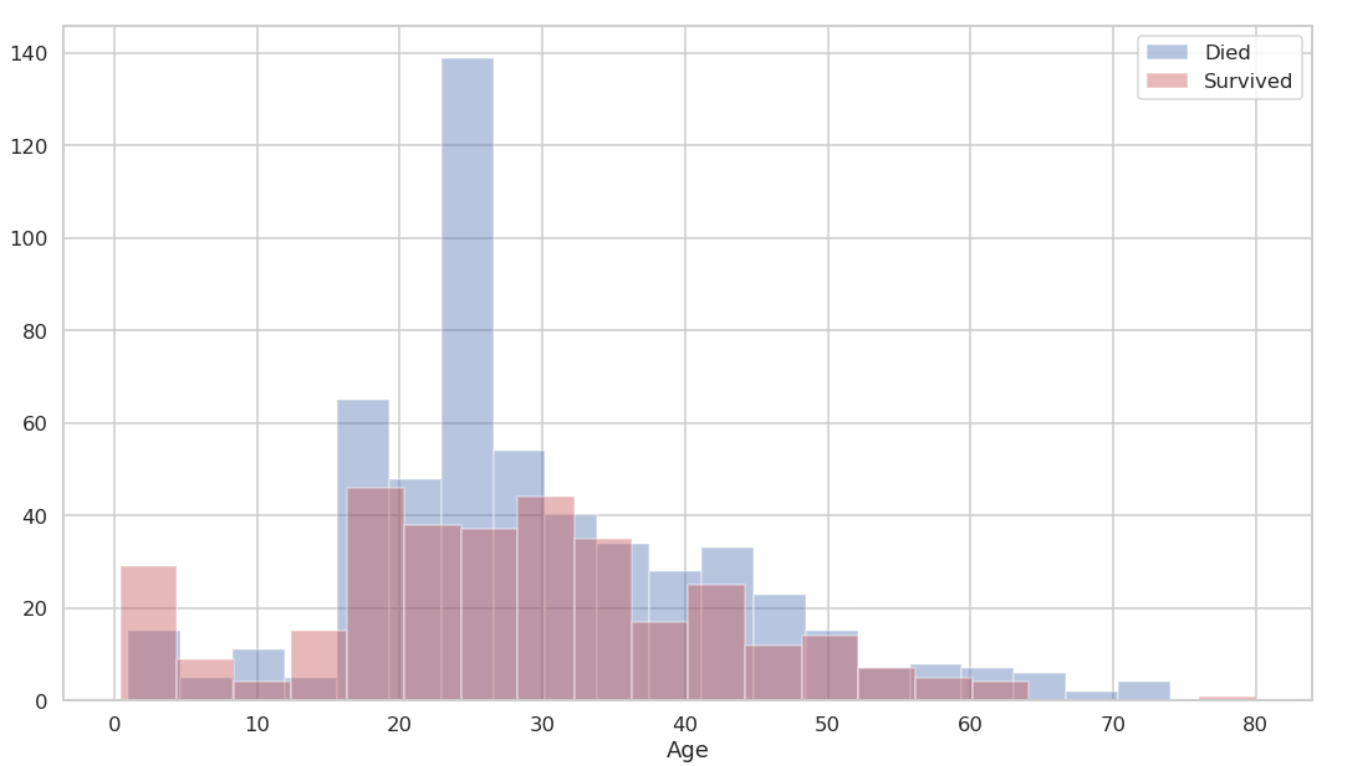

Text(0.5, 1.0, 'Survived = 1')

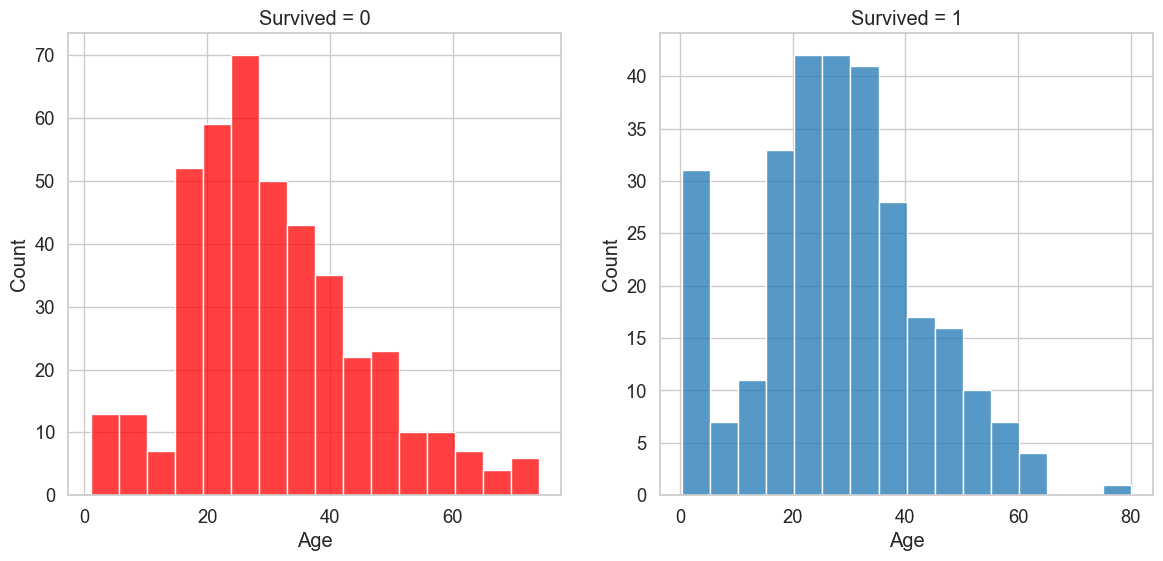

In [12]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.histplot(data=dataset[dataset["Survived"] == 0], x='Age', color='red', ax=axes[0])
axes[0].set_title("Survived = 0")

sns.histplot(data=dataset[dataset["Survived"] == 1], x='Age', ax=axes[1])
axes[1].set_title("Survived = 1")

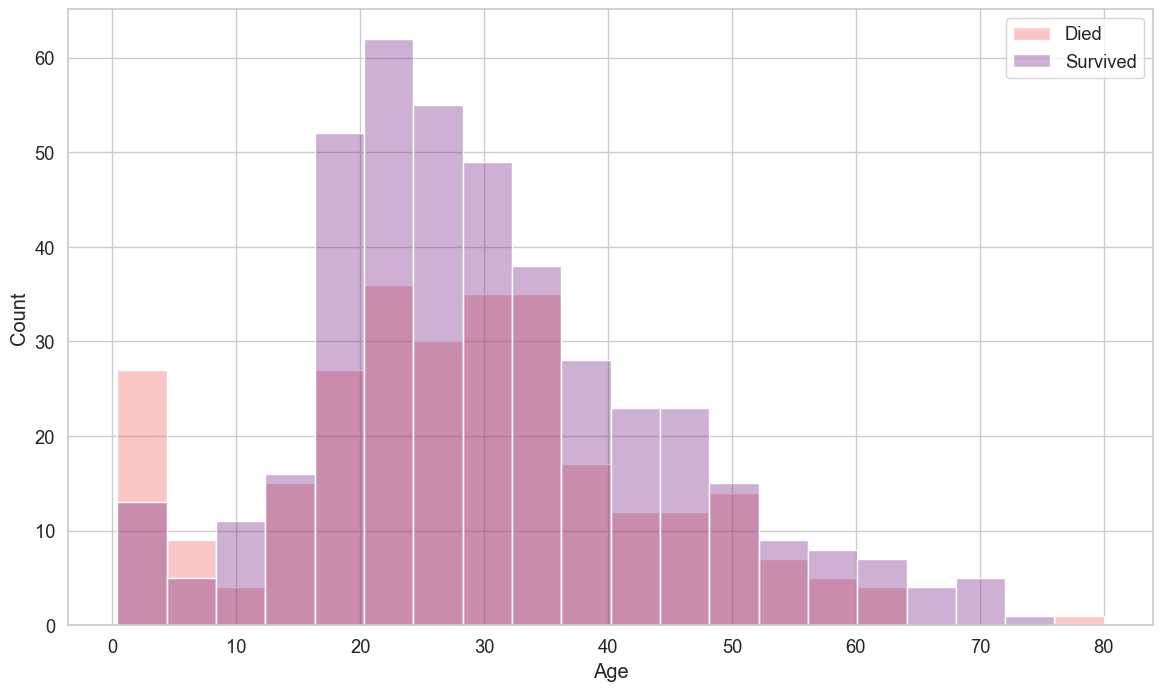

In [13]:
_, ax = plt.subplots(1, figsize=(14, 8))
sns.histplot(data=dataset, x='Age', hue="Survived", palette='magma', alpha=0.35)
plt.legend(["Died", "Survived"])
plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


На мою думку цих графіків вистачить для статистичний оцінок про вікову категорію пасажирів. Ще по графікам зрозуміло, \
що це **НЕ** нормальний розподіл через наявність хвиль та ямок у діаграмі. \
Побудованих візуалізацій буде не достатньо для побудови детальної статистики. Якщо додати ще додатково розріз у гендері, або який \
який клас пасажирів були, то картина буде більш детальна. Можна буде проаналізувати набагато краще.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
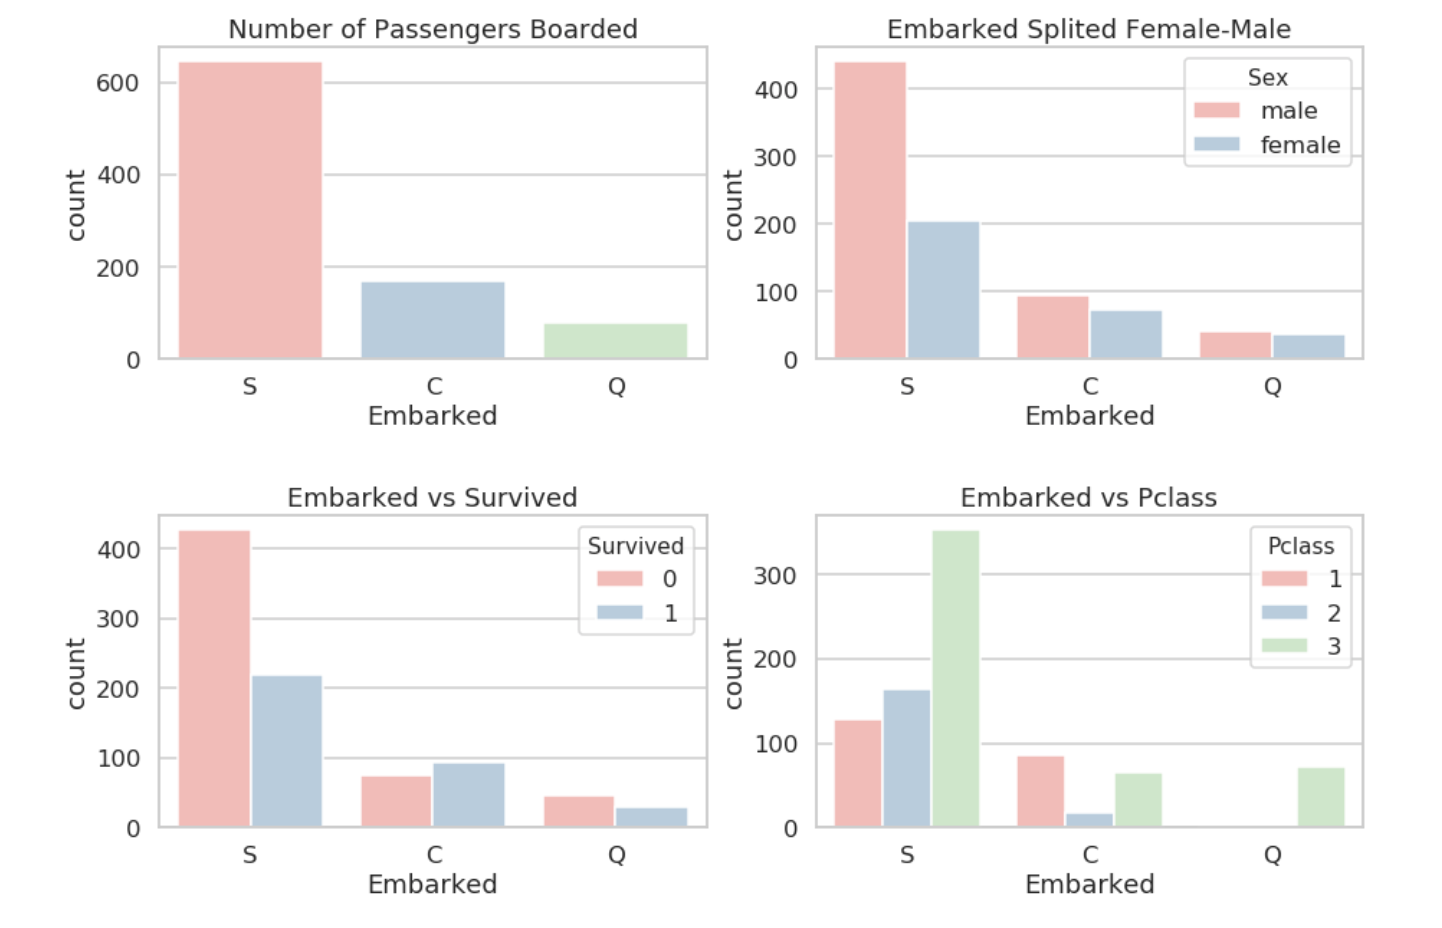

Text(0.5, 1.0, 'Embarked vs Pclass')

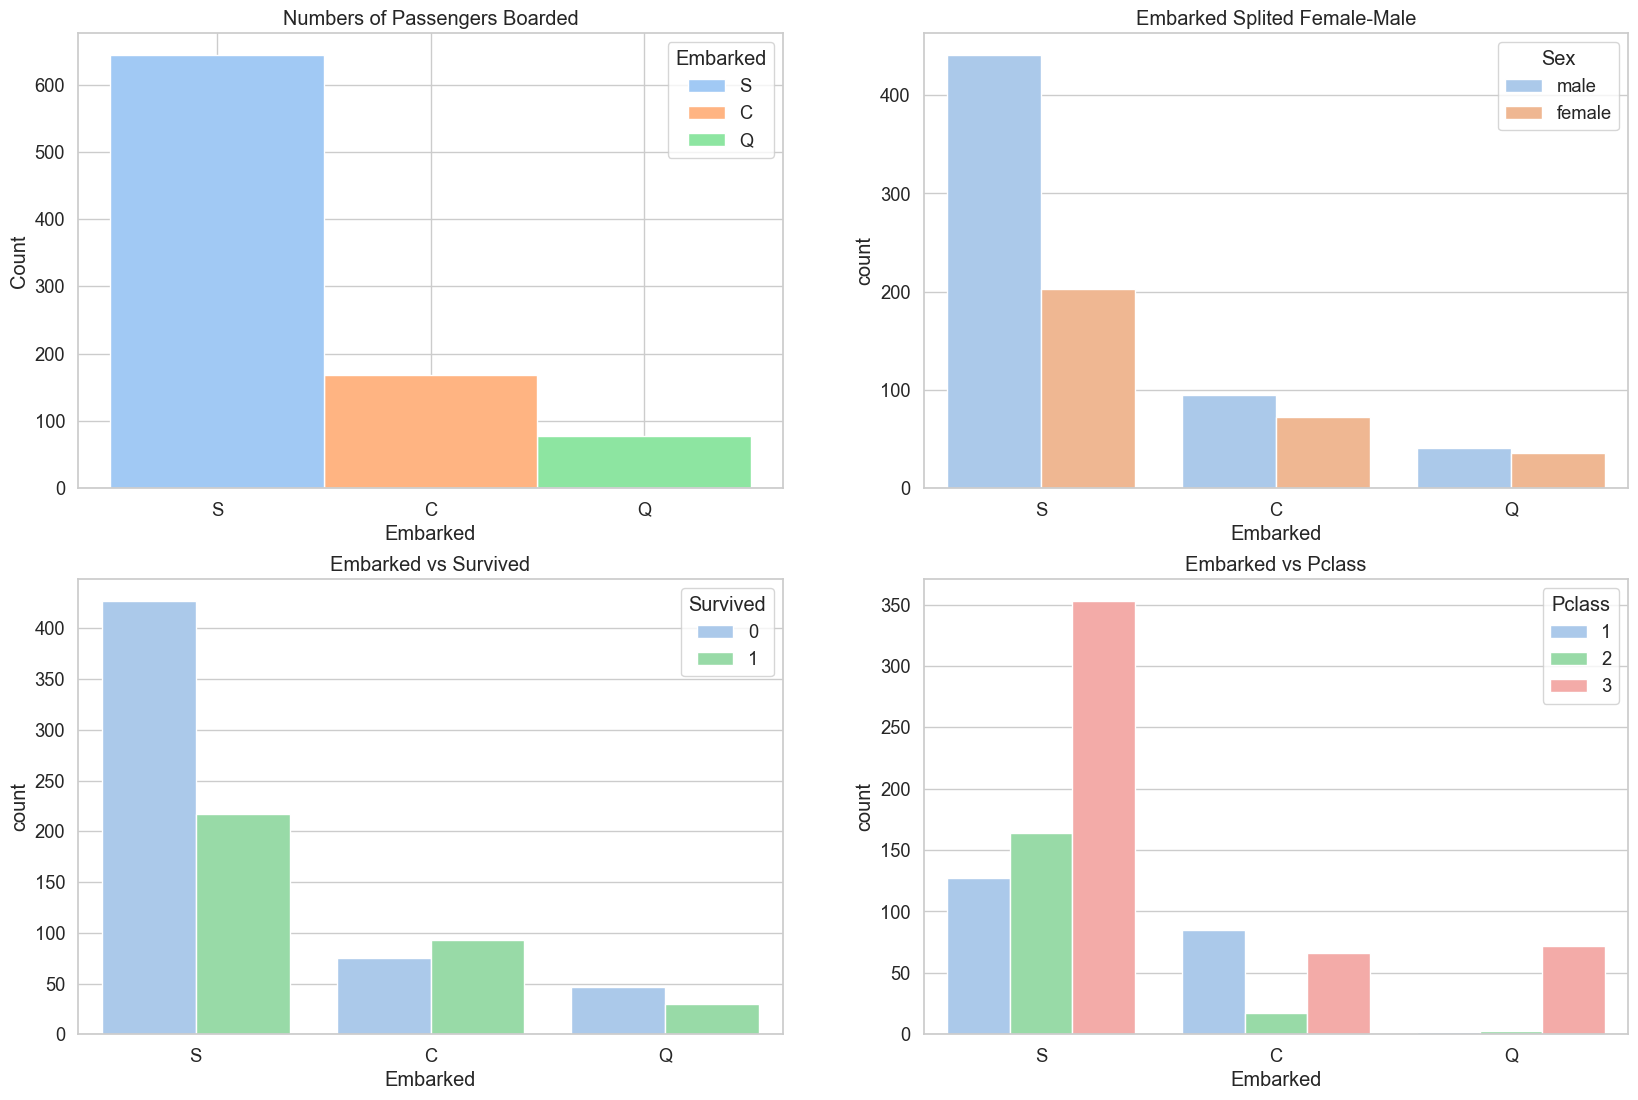

In [14]:
_, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,13))

sns.histplot(data=dataset, x='Embarked', hue='Embarked', ax=axes[0][0], alpha=1, palette='pastel')
axes[0][0].set_title("Numbers of Passengers Boarded")

sns.countplot(data=dataset, x='Embarked', hue='Sex', ax=axes[0][1], alpha=1, palette='pastel')
axes[0][1].set_title("Embarked Splited Female-Male")

sns.countplot(data=dataset, x='Embarked', hue='Survived', ax=axes[1][0], alpha=1, palette='pastel6')
axes[1][0].set_title("Embarked vs Survived")

sns.countplot(data=dataset, x='Embarked', hue='Pclass', ax=axes[1][1], alpha=1, palette='pastel6')
axes[1][1].set_title("Embarked vs Pclass")

```S - Southampton Water, C - Cherbourg, Q - Queenstown``` \
За першою діаграмою ми можому побачити, що найбільше пасажирів сіли на борт титаніка саме у порті **Southampton Water.** \
Друга діаграма показує те саме але у поділі на стать, чоловік та жінка. \
**0 - смерть, 1 - вижив.** \
Третій графік, що знаходиться зліва знизу, показує, що найбільше загинуло людей також з порту **S**, через їхню кількість на борту. \
Ще видно, що найвищий шанс на виживання був у пасажирів, що сіли у порту **Cherbourg.** \
На останньому графіку, показано, що найбільше у порту **S** сіло пасажирів класу **3**, які рахувались найнижчим класом на титаніку. \
А по попереднім графікам, видно, що пасажири класу **3** мали найбільший відсоток смертей.

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

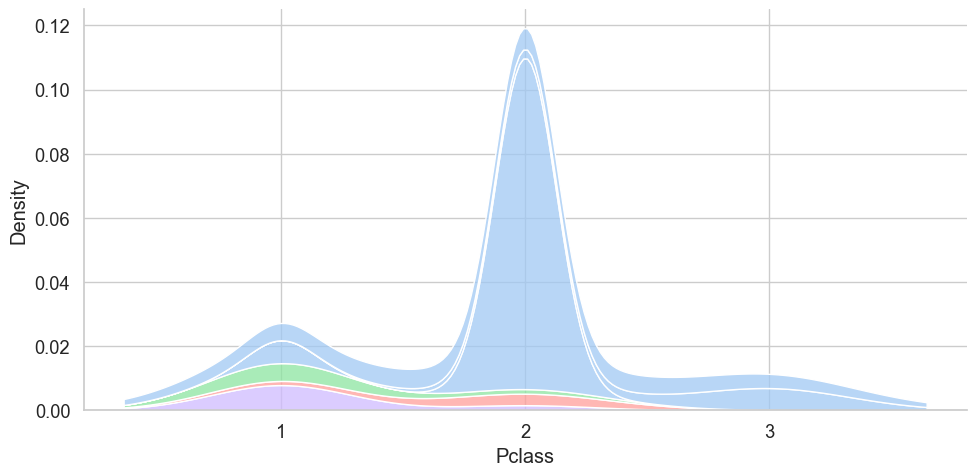

In [15]:
sns.displot(data=dataset, x="Pclass", hue="Fare", alpha=0.75, kind='kde', legend=False, multiple='stack', palette='pastel6', height=5, aspect=2)
plt.xticks([1, 2, 3])
plt.show()

Прокоментуйте побудовані графіки

Графік зображує діаграму розподілу вартості квитка відповідно до якого класу належить пасажир. \
Графік **НЕ** є нормальним розподілом через свою хвилясту форму та доволі довгі хвости. \
Діаграма показує, що найдорожчі квитки у класу **2.** \
А у **3** класі найдешевші квитки.